In [29]:
import tensorflow as tf
import numpy as np
import os
import random
import matplotlib.pyplot as plt


# Load the modelTesting
model = tf.keras.models.load_model('./model_results/model_v6_altered_structure.keras')
model.load_weights('./model_results/model_v6_altered_structure.weights.h5')

Found 425122 files belonging to 47 classes.


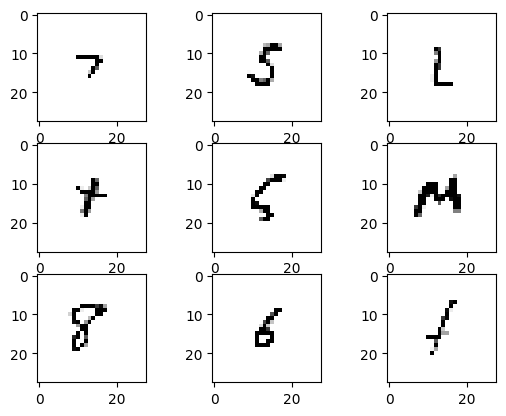

In [30]:
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
IMAGE_CHANNELS = 1

IMAGE_DIRECTORY = "../Datasets/HandWritten-Nist/dataset"
# IMAGE_DIRECTORY = "../Datasets/MergedMNIST/dataset"

dataset = tf.keras.preprocessing.image_dataset_from_directory(
	IMAGE_DIRECTORY,
	labels="inferred",
	label_mode="categorical", # one-hot encoding stuff
	image_size=(28, 28),
	shuffle=True,
	color_mode="grayscale",
)

test_size = int(0.006 * len(dataset))
test_dataset = dataset.take(test_size)

# Load some images
for images, labels in test_dataset.take(1):
	# show the first 9 images
	for i in range(9):
		plt.subplot(330 + 1 + i)
		plt.imshow(images[i].numpy().reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()


In [31]:
# Predict using the model
predictions = model.predict(test_dataset)

79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step


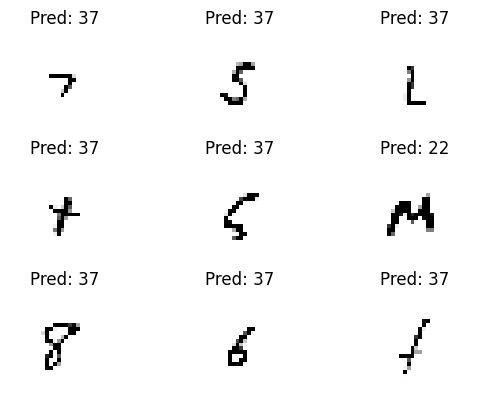

In [32]:
# Display the first 9 predictions
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(images[i].numpy().reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.title(f"Pred: {np.argmax(predictions[i])}")
	plt.axis('off')
plt.show()